# Analysing evaluation results for composite reward with accum waiting time for 4x4grid_resco_train

In [1]:
import os
import pandas as pd
import numpy as np
import sys 

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

sys.path.append(os.path.abspath('../'))
from data_analysis_functions import generate_summary_df_from_csv, \
                                    get_df_from_csv, \
                                    get_trained_and_fixed_from_csv, \
                                    generate_summary_df_from_csv_for_4x4grid_resco # type: ignore

In [2]:
TRAINED_CHECKPOINT_PATHS = ["local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5", 
                            "azure_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_capped/EVALUATION/PPO_2024-05-18_09_44__alpha_0.8", 
                            "azure_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_capped_shorter_sim_size_longer_iter/EVALUATION/PPO_2024-05-19_22_56__alpha_1"
                            ]
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join(os.path.abspath('../'), x) for x in TRAINED_CHECKPOINT_PATHS]
print(TRAINED_CHECKPOINT_PATHS_ABS)

['/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5', '/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/azure_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_capped/EVALUATION/PPO_2024-05-18_09_44__alpha_0.8', '/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/azure_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_capped_shorter_sim_size_longer_iter/EVALUATION/PPO_2024-05-19_22_56__alpha_1']


In [3]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    trained_0_8_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "trained_0_8",
                                    seed = seed)
    trained_1_df = generate_summary_df_from_csv_for_4x4grid_resco(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "trained_1",
                                    seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df,
                                     trained_0_8_df, 
                                     trained_1_df], axis=0)

    return alpha_experiment_df

get dfs for all seeds, and concat

In [4]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 39, 22]
SUMO_SEEDS = [10]
alpha_dfs = [concaten_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined
# alpha_dfs


,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean
fixed_tc,55.138037,58.210311,348.376467,137845.093448,137816.999341,3388.440282,7.711247,15.287334,4.227964,11.059370,7.603732,1.969756,25.2892,495.6420
trained_0_8,51.977505,53.819899,194.998527,129943.761783,129918.188777,2896.581524,8.231650,15.287334,4.597932,10.689402,8.217740,1.045821,20.9052,553.6624
trained_1,52.250647,53.993767,185.270896,130626.617387,130609.128945,2915.326895,8.668969,15.287334,4.597932,10.689402,8.682953,0.909460,17.1492,368.7576


In [19]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean
fixed_tc,55.138037,58.210311,348.376467,137845.093448,137816.999341,3388.440282,7.711247,15.287334,4.227964,11.059370,7.603732,1.969756,25.2892,495.6420
trained_0_8,51.977505,53.819899,194.998527,129943.761783,129918.188777,2896.581524,8.231650,15.287334,4.597932,10.689402,8.217740,1.045821,20.9052,553.6624
trained_1,52.250647,53.993767,185.270896,130626.617387,130609.128945,2915.326895,8.668969,15.287334,4.597932,10.689402,8.682953,0.909460,17.1492,368.7576


## Columns of interest to compare across:

In [20]:
df_average_whole_experiment[['sys_abs_accel_episode_mean', 
                             'sys_abs_accel_episode_sum', 
                             "sys_avg_waiting_time_episode_mean",
                             "sys_abs_accel_episode_integral", 
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean"]]

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_avg_waiting_time_episode_mean,sys_abs_accel_episode_integral,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean
fixed_tc,55.138037,137845.093448,495.6420,137816.999341,25.2892,7.711247
trained_0_8,51.977505,129943.761783,553.6624,129918.188777,20.9052,8.231650
trained_1,52.250647,130626.617387,368.7576,130609.128945,17.1492,8.668969


As you can see above, what we see is that -> 

## Compare diff_accum_wait time for both

In [21]:
TRAINED_CHECKPOINT_PATHS = ["local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5", 
                            "local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-14_19_46__alpha_1"]
TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join(os.path.abspath('../'), x) for x in TRAINED_CHECKPOINT_PATHS]
print(TRAINED_CHECKPOINT_PATHS_ABS)

['/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-13_20_46__alpha_0.5', '/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/local_train/4x4grid_resco_train/combined_reward_with_diff_accum_wait_time_norm/EVALUATION/PPO_2024-05-14_19_46__alpha_1']


In [22]:
fixed_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=10)
trained_0_5_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=10)
trained_1_df_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=10)

fixed_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=22)
trained_0_5_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)
trained_1_df_seed_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)

fixed_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=39)
trained_0_5_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)
trained_1_df_seed_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)

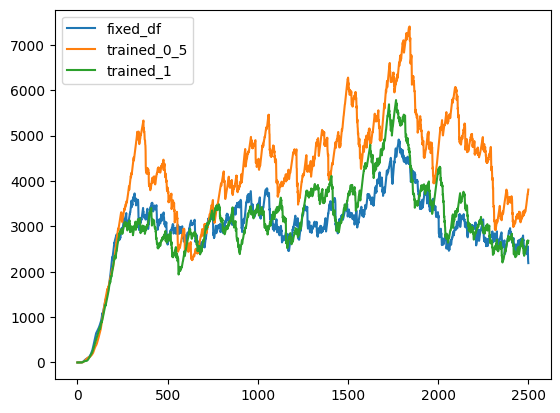

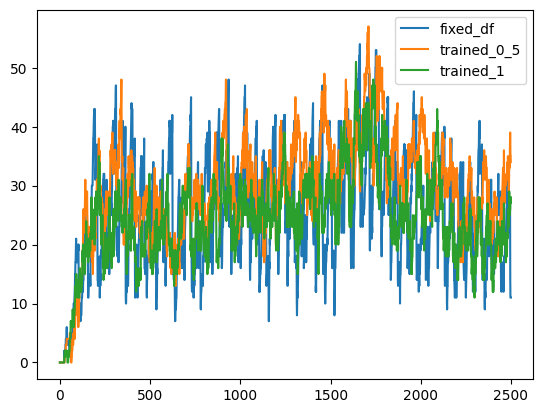

In [23]:
import matplotlib.pyplot as plt

fixed_df_seed_10['sys_accum_waiting_time'].plot(legend='fixed_df')
trained_0_5_df_seed_10['sys_accum_waiting_time'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_accum_waiting_time'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

fixed_df_seed_10['sys_total_stopped'].plot(legend=['fixed_df'])
trained_0_5_df_seed_10['sys_total_stopped'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_total_stopped'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

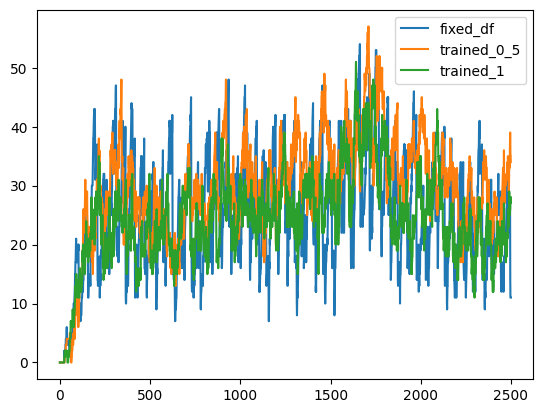

fixed_df_seed_10 trained_0_5_df_seed_10 trained_1_df_seed_10


<BarContainer object of 3 artists>

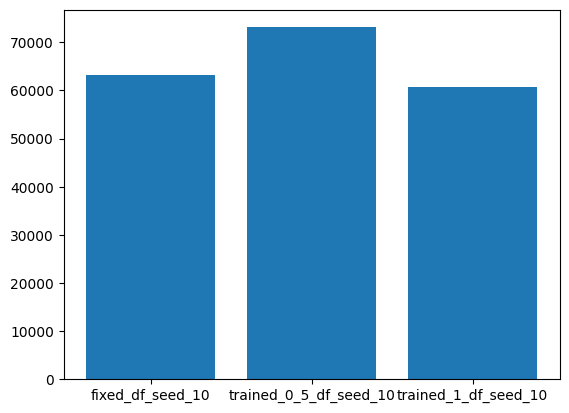

In [10]:
plt.plot([i for i in range(2500)], fixed_df_seed_10['sys_total_stopped'])
plt.plot([i for i in range(2500)], trained_0_5_df_seed_10['sys_total_stopped'])
plt.plot([i for i in range(2500)], trained_1_df_seed_10['sys_total_stopped'])

plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

print('fixed_df_seed_10', "trained_0_5_df_seed_10", "trained_1_df_seed_10")

plt.bar(['fixed_df_seed_10', "trained_0_5_df_seed_10", "trained_1_df_seed_10"],
        [fixed_df_seed_10['sys_total_stopped'].sum(), \
            trained_0_5_df_seed_10['sys_total_stopped'].sum(), \
                trained_1_df_seed_10['sys_total_stopped'].sum()])

In [11]:
fixed_df_seed_10['sys_total_stopped'].mean(), \
    trained_0_5_df_seed_10['sys_total_stopped'].mean(), \
        trained_1_df_seed_10['sys_total_stopped'].mean()

(25.2892, 29.2564, 24.2508)

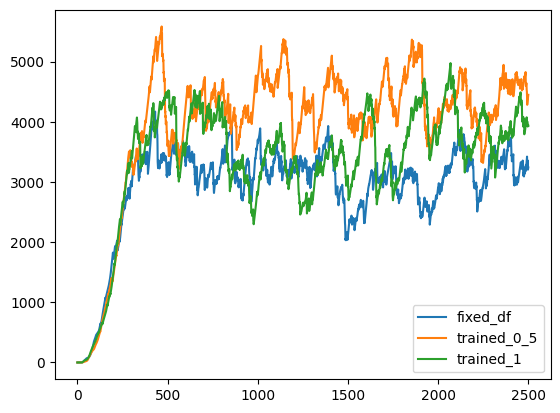

In [12]:
fixed_df_seed_22['sys_accum_waiting_time'].plot(legend='fixed_df')
trained_0_5_df_seed_22['sys_accum_waiting_time'].plot(legend='trained_0_5')
trained_1_df_seed_22['sys_accum_waiting_time'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

In [13]:
fixed_df_seed_10['sys_arrived_vehicles_at_destination'].sum(), \
    trained_0_5_df_seed_10['sys_arrived_vehicles_at_destination'].sum(), \
        trained_1_df_seed_10['sys_arrived_vehicles_at_destination'].sum()

(998, 987, 993)

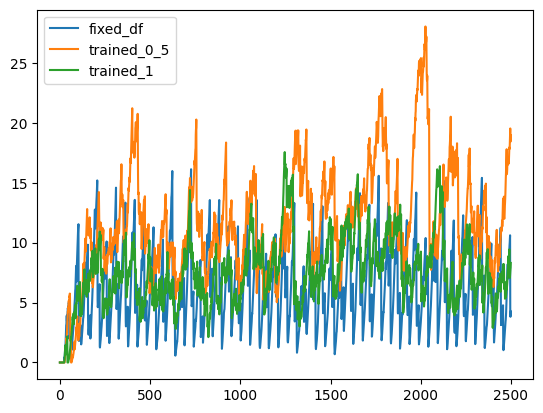

In [14]:
fixed_df_seed_10['sys_avg_wait'].plot(legend='fixed_df')
trained_0_5_df_seed_10['sys_avg_wait'].plot(legend='trained_0_5')
trained_1_df_seed_10['sys_avg_wait'].plot(legend='trained_1')
plt.legend(['fixed_df', "trained_0_5", "trained_1" ])
plt.show()

<Axes: >

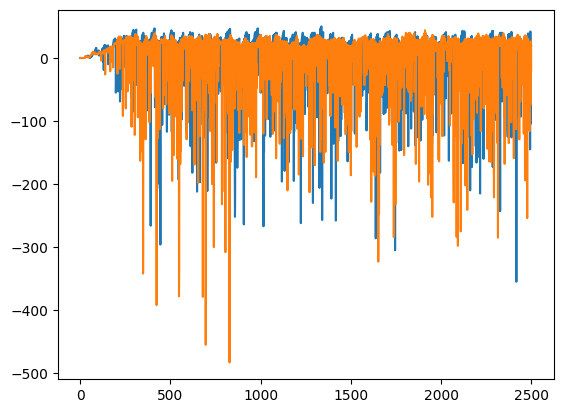

In [15]:
fixed_df_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=22)
trained_df_22 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=22)

fixed_df_22['sys_accum_waiting_time'].diff().plot()
trained_df_22['sys_accum_waiting_time'].diff().plot()

<Axes: >

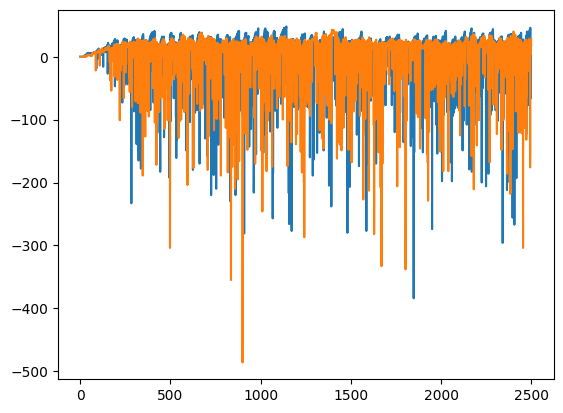

In [16]:
fixed_df_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], eval_dir='fixed_tc', csv_file_name='eval_metrics.csv', seed=39)
trained_df_39 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], eval_dir='trained', csv_file_name='eval_metrics.csv', seed=39)

fixed_df_39['sys_accum_waiting_time'].diff().plot()
trained_df_39['sys_accum_waiting_time'].diff().plot()

In [17]:
fixed_df_39['sys_accum_waiting_time'].diff().sum(), fixed_df_39['sys_accum_waiting_time'].diff().mean()

(3378.0, 1.3517406962785115)

In [18]:
trained_df_39['sys_accum_waiting_time'].diff().sum(), trained_df['sys_accum_waiting_time'].diff().mean()

NameError: name 'trained_df' is not defined

In [ ]:
1.4373 / 0.876

1.6407534246575344

<Axes: >

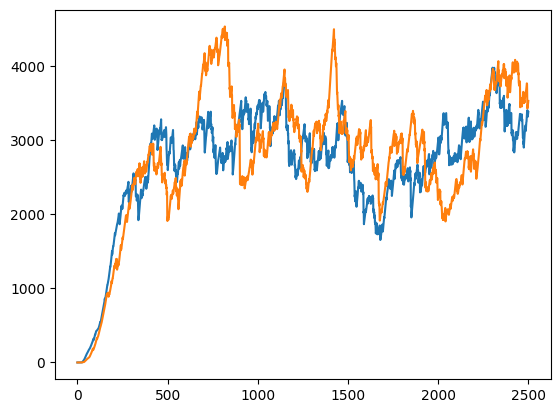

In [ ]:
fixed_df['sys_accum_waiting_time'].plot()
trained_df['sys_accum_waiting_time'].plot()

In [ ]:
fixed_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], csv_file_name="eval_metrics.csv", seed=10, eval_dir='fixed_tc')
fixed_seed_10.describe().iloc[:,9:]

,A0_abs_accel,A0_stopped,A0_average_speed,A0_accumulated_waiting_time,A0_waiting_time,A1_abs_accel,A1_stopped,A1_average_speed,A1_accumulated_waiting_time,A1_waiting_time,A2_abs_accel,A2_stopped,A2_average_speed,A2_accumulated_waiting_time,A2_waiting_time,A3_abs_accel,A3_stopped,A3_average_speed,A3_accumulated_waiting_time,A3_waiting_time,B0_abs_accel,B0_stopped,B0_average_speed,B0_accumulated_waiting_time,B0_waiting_time,B1_abs_accel,B1_stopped,B1_average_speed,B1_accumulated_waiting_time,B1_waiting_time,B2_abs_accel,B2_stopped,B2_average_speed,B2_accumulated_waiting_time,B2_waiting_time,B3_abs_accel,B3_stopped,B3_average_speed,B3_accumulated_waiting_time,B3_waiting_time,C0_abs_accel,C0_stopped,C0_average_speed,C0_accumulated_waiting_time,C0_waiting_time,C1_abs_accel,C1_stopped,C1_average_speed,C1_accumulated_waiting_time,C1_waiting_time,C2_abs_accel,C2_stopped,C2_average_speed,C2_accumulated_waiting_time,C2_waiting_time,C3_abs_accel,C3_stopped,C3_average_speed,C3_accumulated_waiting_time,C3_waiting_time,D0_abs_accel,D0_stopped,D0_average_speed,D0_accumulated_waiting_time,D0_waiting_time,D1_abs_accel,D1_stopped,D1_average_speed,D1_accumulated_waiting_time,D1_waiting_time,D2_abs_accel,D2_stopped,D2_average_speed,D2_accumulated_waiting_time,D2_waiting_time,D3_abs_accel,D3_stopped,D3_average_speed,D3_accumulated_waiting_time,D3_waiting_time
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2.394168,1.718400,0.524429,36.542400,35.530800,2.311130,1.529200,0.552070,31.572400,30.507200,2.658765,1.617600,0.526381,29.960000,29.089200,2.689763,2.006400,0.517682,41.902400,40.404000,2.301620,1.449600,0.548358,27.701200,26.993600,2.229609,1.408800,0.543126,29.480800,28.368400,2.412287,1.322000,0.575261,25.154800,23.893600,2.457985,1.536800,0.523712,29.700800,28.957200,2.478946,1.577200,0.547004,32.247200,31.261200,2.414323,1.176000,0.587079,23.014000,22.298800,2.569376,1.612400,0.529412,33.306400,31.68000,2.556478,1.676800,0.535065,34.217600,32.958000,2.474588,1.729200,0.521014,37.583200,36.61720,2.616612,1.639600,0.546349,33.371600,32.383600,2.501334,1.542800,0.532523,30.012000,29.127600,2.531099,1.736000,0.535114,36.566400,35.544400
std,2.479861,1.516582,0.296474,41.613797,41.409155,2.383180,1.509059,0.287124,37.121605,36.503969,2.568524,1.471678,0.287442,34.733076,34.335743,2.652836,1.701857,0.270685,42.679802,42.403981,2.324308,1.322785,0.268331,32.879786,32.637102,2.513317,1.457715,0.302748,38.192066,37.593292,2.444098,1.369915,0.300105,32.737873,31.694127,2.412493,1.298815,0.274571,32.106891,32.035909,2.544041,1.410261,0.279105,35.269302,34.853311,2.333805,1.236784,0.283816,29.452497,29.055216,2.535863,1.460075,0.282147,37.084685,36.48687,2.449678,1.432607,0.268298,36.169036,35.726007,2.374715,1.317787,0.251803,36.132618,35.98406,2.467082,1.444765,0.266679,38.360048,38.186099,2.434375,1.352072,0.281074,32.582224,32.221884,2.623966,1.428258,0.273724,39.195715,38.860109
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,

In [ ]:
trained_0_5_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[0], csv_file_name="eval_metrics.csv", seed=10, eval_dir='trained')
trained_0_5_seed_10.describe().iloc[:,9:]

,A0_abs_accel,A0_stopped,A0_average_speed,A0_accumulated_waiting_time,A0_waiting_time,A1_abs_accel,A1_stopped,A1_average_speed,A1_accumulated_waiting_time,A1_waiting_time,A2_abs_accel,A2_stopped,A2_average_speed,A2_accumulated_waiting_time,A2_waiting_time,A3_abs_accel,A3_stopped,A3_average_speed,A3_accumulated_waiting_time,A3_waiting_time,B0_abs_accel,B0_stopped,B0_average_speed,B0_accumulated_waiting_time,B0_waiting_time,B1_abs_accel,B1_stopped,B1_average_speed,B1_accumulated_waiting_time,B1_waiting_time,B2_abs_accel,B2_stopped,B2_average_speed,B2_accumulated_waiting_time,B2_waiting_time,B3_abs_accel,B3_stopped,B3_average_speed,B3_accumulated_waiting_time,B3_waiting_time,C0_abs_accel,C0_stopped,C0_average_speed,C0_accumulated_waiting_time,C0_waiting_time,C1_abs_accel,C1_stopped,C1_average_speed,C1_accumulated_waiting_time,C1_waiting_time,C2_abs_accel,C2_stopped,C2_average_speed,C2_accumulated_waiting_time,C2_waiting_time,C3_abs_accel,C3_stopped,C3_average_speed,C3_accumulated_waiting_time,C3_waiting_time,D0_abs_accel,D0_stopped,D0_average_speed,D0_accumulated_waiting_time,D0_waiting_time,D1_abs_accel,D1_stopped,D1_average_speed,D1_accumulated_waiting_time,D1_waiting_time,D2_abs_accel,D2_stopped,D2_average_speed,D2_accumulated_waiting_time,D2_waiting_time,D3_abs_accel,D3_stopped,D3_average_speed,D3_accumulated_waiting_time,D3_waiting_time
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.00000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,2.144121,1.568800,0.545840,62.460800,61.233600,2.241006,1.494800,0.571332,43.727600,42.133600,2.454753,1.67480,0.538022,48.77440,47.092000,2.576521,1.872000,0.537852,62.97680,61.536400,2.316667,1.936800,0.509036,77.232800,75.904400,2.061728,1.507600,0.543763,47.010000,45.534000,2.214540,1.485200,0.545172,53.882000,51.524400,2.588259,2.251600,0.484627,100.823600,96.637200,2.494106,1.96200,0.504096,75.664000,73.074800,2.337594,1.354000,0.560212,37.86640,36.16160,2.022252,2.132400,0.492907,122.29720,111.70520,2.478339,2.106400,0.512175,84.930400,81.550800,2.471128,2.126400,0.515341,71.59280,68.577200,2.643166,2.165600,0.481386,64.44920,62.598000,2.397303,1.912400,0.507799,56.182400,54.035600,2.325143,1.700400,0.535558,50.124000,49.088400
std,2.295519,1.341487,0.288423,76.762109,76.572211,2.506782,1.430941,0.284813,51.231288,50.334517,2.517436,1.45034,0.283130,60.99666,60.447567,2.681985,1.678554,0.283560,100.98396,100.504772,2.433743,1.752608,0.290128,105.011386,104.246092,2.299362,1.445676,0.316050,58.402615,57.769062,2.569917,1.613574,0.324316,101.197528,100.098538,2.617798,1.806434,0.279599,131.017102,130.262305,2.567201,1.75778,0.276060,101.955093,100.580263,2.432784,1.497725,0.295311,64.35518,63.56512,2.314693,2.396741,0.315927,198.77956,193.65616,2.563600,1.876296,0.281407,115.316923,113.801806,2.408756,1.876761,0.269377,97.92653,96.834484,2.597278,1.549689,0.262908,58.57195,58.285752,2.411519,1.638353,0.276496,66.627718,65.924484,2.289761,1.449234,0.261319,57.780634,57.415991
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.00000,0

In [ ]:
trained_0_1_seed_10 = get_df_from_csv(TRAINED_CHECKPOINT_PATHS_ABS[1], csv_file_name="eval_metrics.csv", seed=10, eval_dir='trained')
trained_0_1_seed_10.describe().iloc[:,9:]

,A0_abs_accel,A0_stopped,A0_average_speed,A0_accumulated_waiting_time,A0_waiting_time,A1_abs_accel,A1_stopped,A1_average_speed,A1_accumulated_waiting_time,A1_waiting_time,A2_abs_accel,A2_stopped,A2_average_speed,A2_accumulated_waiting_time,A2_waiting_time,A3_abs_accel,A3_stopped,A3_average_speed,A3_accumulated_waiting_time,A3_waiting_time,B0_abs_accel,B0_stopped,B0_average_speed,B0_accumulated_waiting_time,B0_waiting_time,B1_abs_accel,B1_stopped,B1_average_speed,B1_accumulated_waiting_time,B1_waiting_time,B2_abs_accel,B2_stopped,B2_average_speed,B2_accumulated_waiting_time,B2_waiting_time,B3_abs_accel,B3_stopped,B3_average_speed,B3_accumulated_waiting_time,B3_waiting_time,C0_abs_accel,C0_stopped,C0_average_speed,C0_accumulated_waiting_time,C0_waiting_time,C1_abs_accel,C1_stopped,C1_average_speed,C1_accumulated_waiting_time,C1_waiting_time,C2_abs_accel,C2_stopped,C2_average_speed,C2_accumulated_waiting_time,C2_waiting_time,C3_abs_accel,C3_stopped,C3_average_speed,C3_accumulated_waiting_time,C3_waiting_time,D0_abs_accel,D0_stopped,D0_average_speed,D0_accumulated_waiting_time,D0_waiting_time,D1_abs_accel,D1_stopped,D1_average_speed,D1_accumulated_waiting_time,D1_waiting_time,D2_abs_accel,D2_stopped,D2_average_speed,D2_accumulated_waiting_time,D2_waiting_time,D3_abs_accel,D3_stopped,D3_average_speed,D3_accumulated_waiting_time,D3_waiting_time
count,2500.000000,2500.000000,2500.000000,2500.0000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.00000
mean,2.325086,1.591600,0.552108,48.1048,47.07480,2.212524,1.340000,0.581156,35.089200,33.860800,2.589176,1.554000,0.572332,36.106800,34.648400,2.535976,1.841200,0.548699,55.700800,50.879200,2.389569,1.549600,0.535939,34.623600,33.647600,1.980204,1.282400,0.545535,35.240800,34.687200,2.241562,1.420800,0.553744,30.249200,28.143600,2.333673,1.463200,0.536139,36.705200,33.42440,2.464110,1.276800,0.592584,34.916000,34.282400,2.325925,1.685200,0.506497,60.604800,53.275200,2.363130,1.271600,0.589021,34.010000,32.694400,2.408623,1.40520,0.586693,29.633200,28.919600,2.460373,1.626800,0.574178,41.128800,39.842400,2.642451,1.388400,0.595594,33.282000,32.068800,2.601817,1.599600,0.548545,34.985200,32.404800,2.371051,1.942400,0.518427,73.248000,70.89360
std,2.352612,1.488925,0.285077,90.1982,89.09874,2.283490,1.347712,0.289251,44.253902,43.756719,2.526440,1.432447,0.286308,44.754457,44.142952,2.525654,1.814525,0.276622,81.150412,76.948826,2.362965,1.273809,0.271117,38.314064,38.300013,2.317822,1.232582,0.308067,45.003024,44.916674,2.448606,1.528876,0.317667,45.923025,44.345489,2.342420,1.445781,0.290556,49.893154,45.96172,2.557599,1.252841,0.286260,48.065758,47.955347,2.486855,2.106152,0.302894,110.404458,96.510976,2.465090,1.411464,0.303328,60.826319,60.196831,2.552903,1.41768,0.275347,40.091425,39.682054,2.322518,1.577503,0.265033,59.545674,58.654324,2.568735,1.468063,0.295485,46.395675,45.648842,2.591096,1.405728,0.267656,39.975525,37.334553,2.439535,1.695238,0.283463,105.435647,105.11322
min,0.000000,0.000000,0.000000,0.0000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0